# Reviewing rainfall around landfall

In [36]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
import os
import pandas as pd
from pathlib import Path
from src import constants
import matplotlib.pyplot as plt
import math

In [38]:
rain_df = pd.read_csv(
    Path(constants.AA_DATA_DIR)
    / "public"
    / "processed"
    / "mdg"
    / "daily_imerg_cyclone_landfall_fixed_adm0_v7.csv"
)

In [39]:
threshold = 180

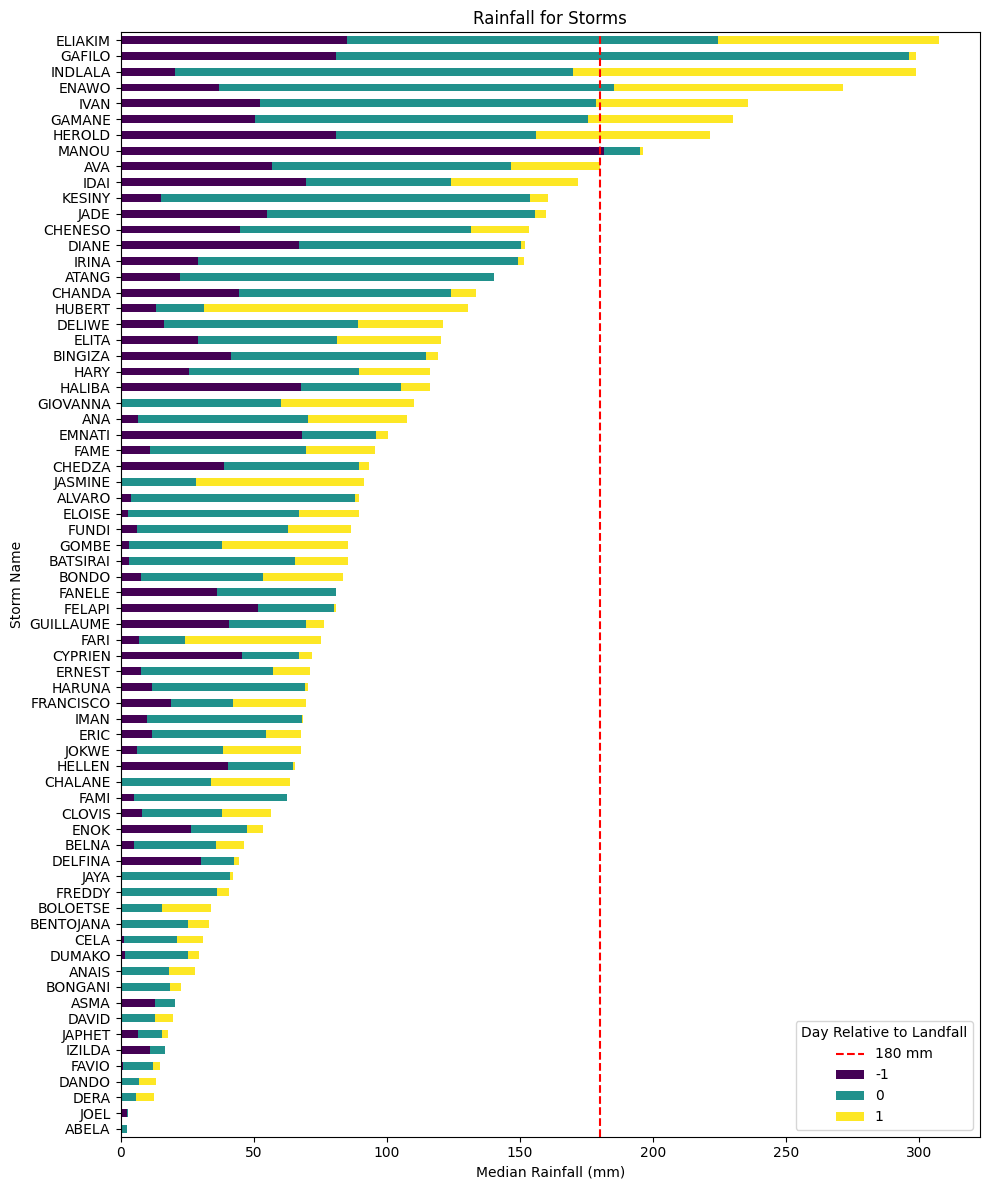

In [43]:
# Filter for specific time steps
df_time_steps = rain_df[rain_df["time_step"].isin([-1, 0, 1])]
df_time_steps["time_step"] = df_time_steps["time_step"].astype(int)

# Filter for radius 250 km
df_filtered = df_time_steps[df_time_steps["radius"] == 250]

# Pivot the data for a stacked bar plot
df_pivot = df_filtered.pivot_table(
    index="storm",
    columns="time_step",
    values="median_precip",
    aggfunc="mean",
)

# Fill NaNs with 0 for missing values
df_pivot.fillna(0, inplace=True)

# Sort storms by total rainfall
df_pivot["total_rainfall"] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by="total_rainfall", ascending=False)

# Drop the total rainfall column for plotting
df_pivot.drop(columns="total_rainfall", inplace=True)

# Create a single plot for all storms
fig, ax = plt.subplots(figsize=(10, 12))

# Plot the data
df_pivot.plot(kind="barh", stacked=True, ax=ax, colormap="viridis")

# Add a vertical line for reference (optional)
ax.axvline(x=threshold, color="red", linestyle="--", label=f"{threshold} mm")

# Set title and labels
ax.set_title("Rainfall for Storms")
ax.set_xlabel("Median Rainfall (mm)")
ax.set_ylabel("Storm Name")
ax.legend(title="Day Relative to Landfall", loc="lower right")

# Invert y-axis for proper ordering
ax.invert_yaxis()

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()